In [1]:
import math
from scipy.stats.qmc import Sobol
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def function(x):
    return np.sqrt(1-x**2)

In [7]:
from scipy.stats.qmc import Sobol

# Define the domain
count = 2 ** 10
x1, x2 = -1, 1
y1, y2 = 0, 1
in_domain = 0
domain_fill = (x2 - x1) * (y2 - y1)

# Initialize Sobol sequence generator for 2D points
sobol = Sobol(d=2, scramble=True)

# Generate quasi-random points
quasi_random_points = sobol.random(count)

# Placeholder lists
points_on_domain = []
points_outside_of_domain = []
intermediate_integral_calcs = []

# Perform Monte Carlo integration
for i, (x, y) in enumerate(quasi_random_points, start=1):
    # Scale the quasi-random points to the desired range
    x_coord = x * (x2 - x1) + x1
    y_coord = y * (y2 - y1) + y1

    # Check if the point is inside the domain
    if y_coord < function(x_coord):
        points_on_domain.append((x_coord, y_coord))
        in_domain += 1
    else:
        points_outside_of_domain.append((x_coord, y_coord))

    # Calculate the intermediate integral
    intermediate_integral_calcs.append(in_domain / i * domain_fill)


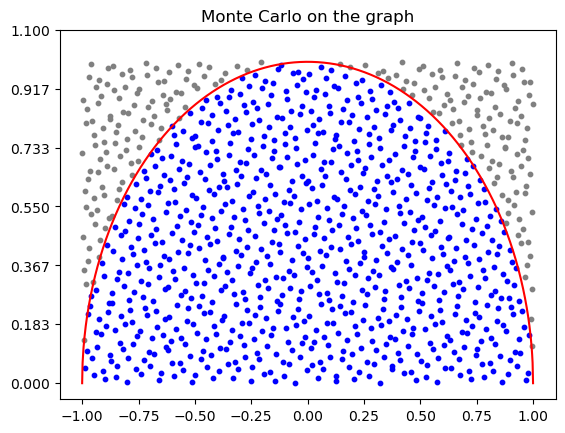

In [8]:
x = np.linspace(x1, x2, 1000)
y = function(x)

x_coords, y_coords = zip(*points_on_domain)  
plt.scatter(x_coords, y_coords, color='blue', label='dots under graph', s=10)
x_coords, y_coords = zip(*points_outside_of_domain)
plt.scatter(x_coords, y_coords, color='gray', label='dots above graph', s=10)
plt.plot(x, y, color='red')
plt.title('Monte Carlo on the graph')
plt.yticks(np.linspace(0, 1.1, 7))
plt.show()

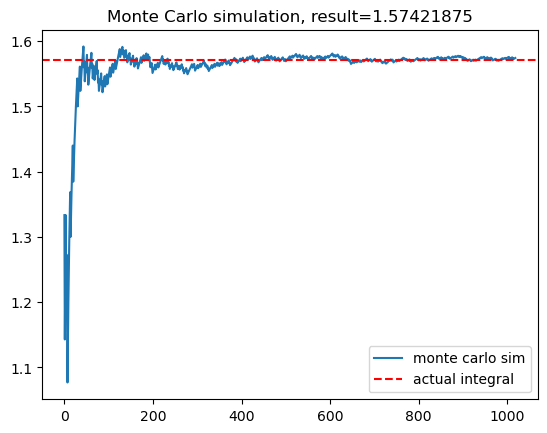

In [12]:
plt.plot(intermediate_integral_calcs[5:], label='monte carlo sim')
plt.axhline(y=math.pi/2, color='r', linestyle='--', label="actual integral")
plt.title(f'Monte Carlo simulation, result={intermediate_integral_calcs[-1]}')
plt.legend()
plt.show()

In [10]:
print('actual pi:', math.pi)
print('pi estimation:', intermediate_integral_calcs[-1]*2)

actual pi: 3.141592653589793
pi estimation: 3.1484375
